# Lab 4: Learning & Adaptive Systems (ML4SE)
**Course:** COME6304 - Special Topics in Software Engineering  
**Student:** Nchinde Tandjong Josue (UBa25EP063)  

## Objective
To implement and compare supervised (Decision Trees, Naïve Bayes, Neural Networks) and unsupervised (K-Means) learning algorithms for **Software Defect Prediction**.

In [ ]:
# CELL 1: Setup & Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import local data generator
from data_generator import generate_software_data

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier # Replaces TensorFlow for stability
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Libraries Loaded.")

✅ Libraries Loaded.


Dataset Shape: (1000, 5)


,LOC,Complexity,Code_Churn,Team_Size,Defect_Risk
0,349,21.7,5.2,7,0
1,286,17.1,0.7,11,0
2,364,18.4,4.3,12,0
3,452,20.7,1.2,14,1
4,276,15.9,16.5,14,0


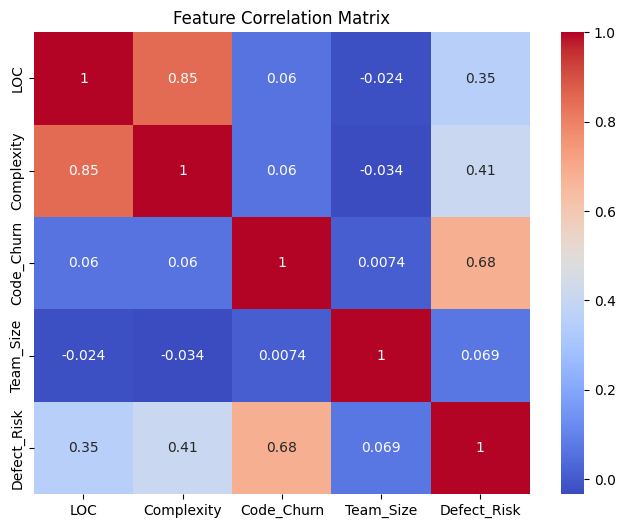

In [3]:
# CELL 2: Data Generation
df = generate_software_data(n_samples=1000)

print("Dataset Shape:", df.shape)
display(df.head())

# Correlation Check
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [4]:
# CELL 3: Preprocessing
X = df.drop('Defect_Risk', axis=1)
y = df['Defect_Risk']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data (Crucial for NN and K-Means)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data Ready.")

✅ Data Ready.


## Task 1: Decision Trees (White Box Model)

Decision Tree Accuracy: 0.8600


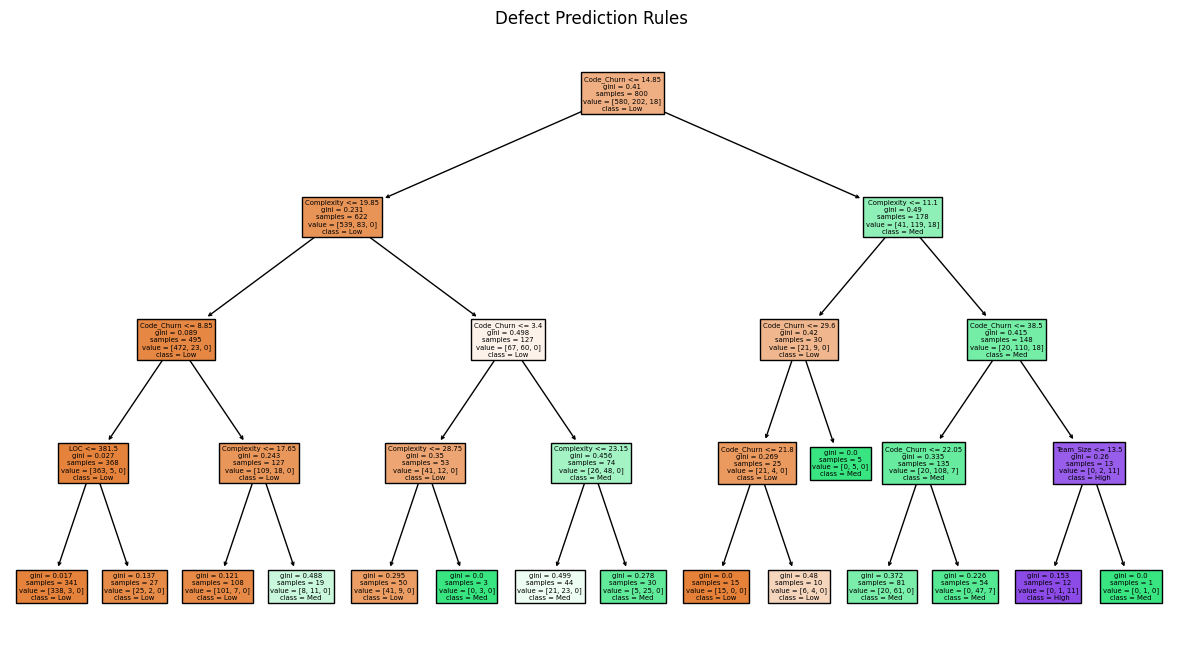

In [5]:
# CELL 4: Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.4f}")

plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, class_names=['Low', 'Med', 'High'])
plt.title("Defect Prediction Rules")
plt.show()

## Task 2: Naïve Bayes (Probabilistic Model)

In [6]:
# CELL 5: Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print(f"Naïve Bayes Accuracy: {accuracy_score(y_test, nb_pred):.4f}")

Naïve Bayes Accuracy: 0.9000


## Task 3: Neural Networks (Deep Learning)
*Note: Using Scikit-Learn MLPClassifier to ensure compatibility with Windows environments lacking C++ redistributables.*

Training Neural Network...
Neural Network Accuracy: 0.8900


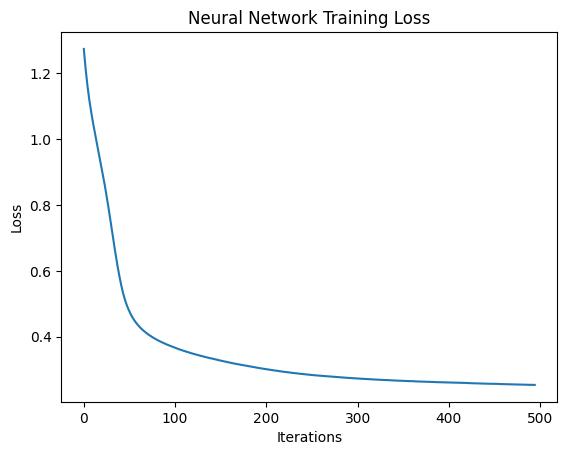

In [7]:
# CELL 6: Neural Network (MLP)
# Architecture: Input -> Hidden(16) -> Hidden(8) -> Output(3)
nn_model = MLPClassifier(hidden_layer_sizes=(16, 8), 
                         activation='relu', 
                         solver='adam', 
                         max_iter=500, 
                         random_state=42)

print("Training Neural Network...")
nn_model.fit(X_train_scaled, y_train)

nn_pred = nn_model.predict(X_test_scaled)
print(f"Neural Network Accuracy: {accuracy_score(y_test, nn_pred):.4f}")

# Plot Loss Curve
plt.plot(nn_model.loss_curve_)
plt.title("Neural Network Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## Task 4: Unsupervised Learning (K-Means)

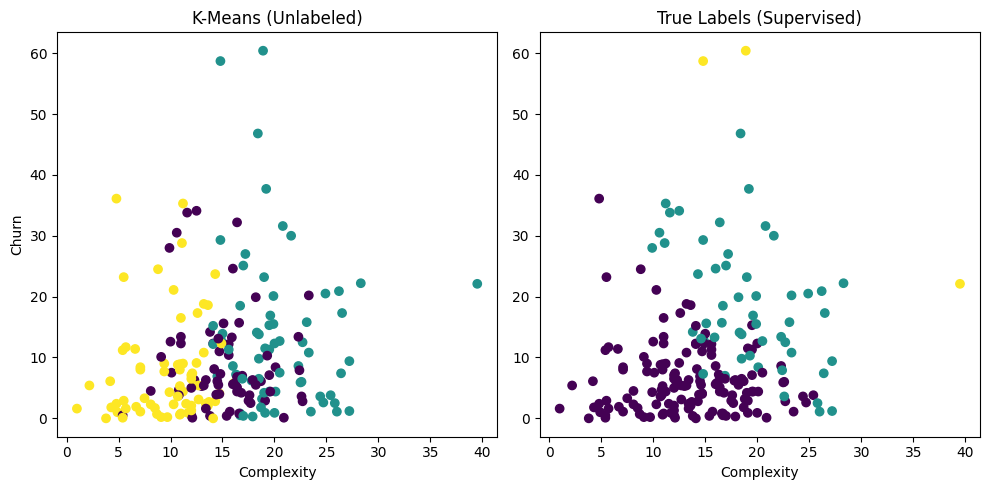

In [8]:
# CELL 7: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_test_scaled)

# Visualize
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['Complexity'], X_test['Code_Churn'], c=clusters, cmap='viridis')
plt.title("K-Means (Unlabeled)")
plt.xlabel("Complexity"); plt.ylabel("Churn")

plt.subplot(1, 2, 2)
plt.scatter(X_test['Complexity'], X_test['Code_Churn'], c=y_test, cmap='viridis')
plt.title("True Labels (Supervised)")
plt.xlabel("Complexity")

plt.tight_layout()
plt.show()